In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [3]:
#포지션 개수 세기
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [4]:
#시각화해서 살펴보기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'STL and 2P in 2d plane')

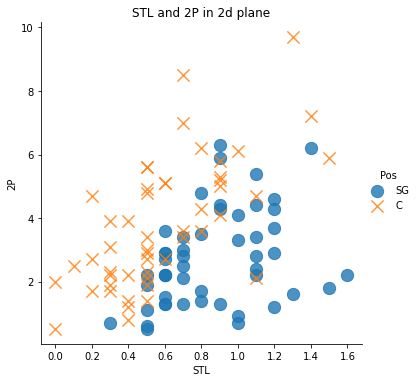

In [5]:
#스틸, 2점슛 데이터 시각화

sns.lmplot('STL', '2P', data=df, fit_reg=False,
           scatter_kws = {"s": 150},
           markers=["o", "x"],
           hue="Pos")
plt.title('STL and 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST and 2p in 2d plane')

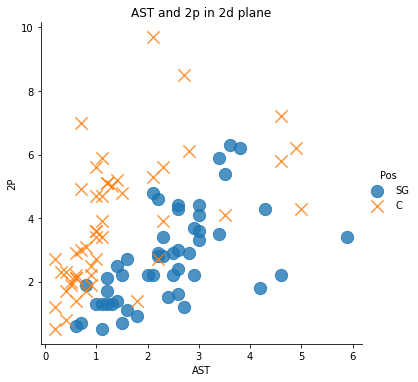

In [6]:
#어시스트, 2점슛 공간의 데이터 시각화

sns.lmplot('AST', '2P', data = df, fit_reg = False,
           scatter_kws = {'s' : 150},
           markers = ['o','x'],
           hue = 'Pos')
plt.title("AST and 2p in 2d plane")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLK and 3P in 2d plane')

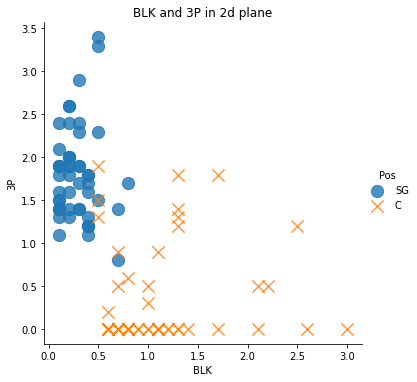

In [7]:
#블로킹, 3점슛 데이터 시각화

sns.lmplot('BLK', '3P', data = df, fit_reg = False,
           scatter_kws = {'s' : 150},
           markers = ['o', 'x'],
           hue = 'Pos')

plt.title('BLK and 3P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TRB and 3P in 2d plane')

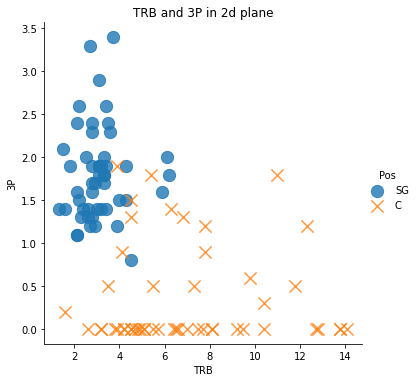

In [8]:
#리바운드, 3점슛 데이터 시각화

sns.lmplot('TRB', '3P', data = df, fit_reg= False,
           scatter_kws = {'s': 150},
           markers = ['o', 'x'],
           hue = 'Pos')

plt.title('TRB and 3P in 2d plane')

In [9]:
## 그래프를 통해 봤을 때 스틸, 어시스트, 2P는 변별력이 크지 않음. / 블록, 리바운드, 3P의 변별력이 더 높다

In [10]:
#<데이터 전처리>

In [11]:
#변별력 없는 변수 제거

df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True)

#axis = 1 : 행별로 관련 변수 값 제거 / inplace : 원본 값 수정함.

df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [12]:
#<데이터 나누기> : 학습데이터와 테스트데이터 구분

#20%를 테스트 데이터로 분류
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [13]:
#데이터 개수 보기

print(train.shape[0])
print(test.shape[0])

80
20


In [14]:
#<최적의 kNN 파라미터 찾기>

## 사이킷런의 cross_val_score을 통한 검증(k-fold 교차검증 방식)
### 학습데이터를 10개로 나누고, 90%를 학습데이터, 10%를 검증데이터로 사용하여 10개의 검증결과를 산술평균 낸 결과 값으로 최적값을 추정함.

#### k의 범위는 3부터 학습데이터 수의 절반으로 설정하고 최적값을 도출함.
#### 10-fold을 각각의 k 값을 대상으로 검증결과 저장

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
  k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list :
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                           scoring = 'accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9125,
 0.85,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.8375,
 0.8,
 0.8125,
 0.8125,
 0.8125,
 0.775]

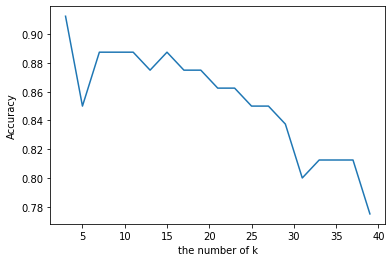

In [15]:
# k값에 대한 각각의 정확성 평균값을 시각화해보기

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [20]:
#예측율 높은 k 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('the best number of k : ' + str(k))

the best number of k : 3


In [22]:
#<모델테스트>

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = k)

# [kNN 모델 학습]

##(학습)독립변수 지정 : 3P, 블락, 리바운드
x_train = train[['3P', 'BLK', 'TRB']]
##(학습)종속변수 지정
y_train = train[['Pos']]
##kNN 모델학습
knn.fit(x_train, y_train.values.ravel())

# [kNN 모델 테스트]

##(테스트)독립변수
x_test = test[['3P', 'BLK', 'TRB']]
##(테스트)종속변수
y_test = test[['Pos']]
##테스트
pred = knn.predict(x_test)

##정확도 출력
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)))




accuracy : 0.9


In [23]:
##실제 값과 학습 값 비교해보기

comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,SG
3,C,SG
4,SG,SG
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,SG,SG
